# Data Visualization Lab - Sebastiano Cassol - id: 229318
> 12 - 06 - 2020

## Exercise 1
(...)

## Exercise 2
(...)

## Exercise 3
(...)

## Exercise 4
Choropleth map of a geographical region (Europe, Asia, etc.) displaying one (or more) of the columns (HDI.Rank, HDI, CPI) from `economist_data.csv`.

In [17]:
# import 
import pandas as pd

In [18]:
data = pd.read_csv("../economist_data.csv")

data

,Country,HDI.Rank,HDI,CPI,Region
0,Afghanistan,172,0.398,1.5,Asia Pacific
1,Albania,70,0.739,3.1,East EU Cemt Asia
2,Algeria,96,0.698,2.9,MENA
3,Angola,148,0.486,2.0,SSA
4,Argentina,45,0.797,3.0,Americas
...,...,...,...,...,...
168,Vanuatu,125,0.617,3.5,Asia Pacific
169,Venezuela,73,0.735,1.9,Americas
170,Yemen,154,0.462,2.1,MENA
171,Zambia,164,0.430,3.2,SSA


In [19]:
# retrieve the list of countries
countries = data.Country.unique().tolist()

countries

['Afghanistan',
 'Albania',
 'Algeria',
 'Angola',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Britain',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo',
 'Congo  Republic',
 'Costa Rica',
 "Côte d'Ivoire",
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',
 'Haiti',
 'Honduras',
 'Hong Kong',
 'Hungary',
 'Iceland',
 'India',
 'Indonesia',
 'Iran',
 'Iraq',
 'Ireland',
 'I

In [20]:
# what is the highest HDI value?
data.HDI.max()

0.943

In [21]:
# imports for choroplet map
import numpy as np
import matplotlib.pyplot as plt
import json

In [22]:
with open ('../../../geojson/custom.geo.json') as geojson:
    worldmap = json.load(geojson)

worldmap

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'properties': {'scalerank': 1,
    'featurecla': 'Admin-0 country',
    'labelrank': 5,
    'sovereignt': 'United Kingdom',
    'sov_a3': 'GB1',
    'adm0_dif': 1,
    'level': 2,
    'type': 'Dependency',
    'admin': 'Falkland Islands',
    'adm0_a3': 'FLK',
    'geou_dif': 0,
    'geounit': 'Falkland Islands',
    'gu_a3': 'FLK',
    'su_dif': 0,
    'subunit': 'Falkland Islands',
    'su_a3': 'FLK',
    'brk_diff': 1,
    'name': 'Falkland Is.',
    'name_long': 'Falkland Islands',
    'brk_a3': 'B12',
    'brk_name': 'Falkland Is.',
    'brk_group': None,
    'abbrev': 'Flk. Is.',
    'postal': 'FK',
    'formal_en': 'Falkland Islands',
    'formal_fr': None,
    'note_adm0': 'U.K.',
    'note_brk': 'Admin. by U.K.; Claimed by Argentina',
    'name_sort': 'Falkland Islands',
    'name_alt': 'Islas Malvinas',
    'mapcolor7': 6,
    'mapcolor8': 6,
    'mapcolor9': 6,
    'mapcolor13': 3,
    'pop_est': 3140,
    'g

In [23]:
# prepare addition data for the map
max_hdi = data.HDI.max()
min_hdi = data.HDI.min()

In [24]:
# import required module
import matplotlib.pyplot as plt
import plotly.express as px

# create choroplet map with px.choropleth

fig = px.choropleth_mapbox(data, 
                    geojson=worldmap,
                    locations="Country",
                    featureidkey="properties.name", 
                    color="HDI", 
                    hover_name="Country", 
                    color_continuous_scale='Viridis',
                    range_color=(min_hdi, max_hdi),
                    labels={'HDI':'Human Development Index', 'CPI': 'CPI'},
                    title="HDI and CPI in the world",
                    hover_data=['CPI', 'HDI'],
                    center={'lat': 0, 'lon': 0},
                    mapbox_style="carto-positron",
                    zoom=3
                    )

fig.update_geos(
    showcountries=True,
    showcoastlines=True,
    showland=True,
    fitbounds="geojson",
)

fig.update_layout(
    margin={"r":0,"t":0,"l":0,"b":0}
)

fig.show()

## Exercise 5
Dimensionality reduction planar projection of `coutries.csv`, using the method you rate as the most adequate.

In [25]:
# imports
import time
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [26]:
countries_dataset = pd.read_csv("../countries.csv")

countries_dataset

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,West Bank,NEAR EAST,2460492,5860,"419,9","0,00","2,98","19,62",800.0,NaN,"145,2","16,9","18,97","64,13",3,"31,67","3,92","0,09","0,28","0,63"
223,Western Sahara,NORTHERN AFRICA,273008,266000,"1,0","0,42",NaN,NaN,NaN,NaN,NaN,"0,02",0,"99,98",1,NaN,NaN,NaN,NaN,"0,4"
224,Yemen,NEAR EAST,21456188,527970,"40,6","0,36",0,"61,5",800.0,"50,2","37,2","2,78","0,24","96,98",1,"42,89","8,3","0,135","0,472","0,393"
225,Zambia,SUB-SAHARAN AFRICA,11502010,752614,"15,3","0,00",0,"88,29",800.0,"80,6","8,2","7,08","0,03","92,9",2,41,"19,93","0,22","0,29","0,489"


In [27]:
# we don't need info about country and region
contries_dataset = countries_dataset.dropna()

countries_dataset = contries_dataset.iloc[:, 2:]

countries_dataset

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
6,13477,102,"132,1","59,80","10,76","21,03",8600.0,"95,0","460,0",0,0,100,2,"14,17","5,34","0,04","0,18","0,78"
7,69108,443,"156,0","34,54","-6,15","19,46",11000.0,"89,0","549,9","18,18","4,55","77,27",2,"16,93","5,37","0,038","0,22","0,743"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,25730435,912050,"28,2","0,31","-0,04","22,2",4800.0,"93,4","140,1","2,95","0,92","96,13",2,"18,71","4,92","0,04","0,419","0,541"
219,84402966,329560,"256,1","1,05","-0,45","25,95",2500.0,"90,3","187,7","19,97","5,95","74,08",2,"16,86","6,22","0,209","0,41","0,381"
224,21456188,527970,"40,6","0,36",0,"61,5",800.0,"50,2","37,2","2,78","0,24","96,98",1,"42,89","8,3","0,135","0,472","0,393"
225,11502010,752614,"15,3","0,00",0,"88,29",800.0,"80,6","8,2","7,08","0,03","92,9",2,41,"19,93","0,22","0,29","0,489"


In [28]:
columns = countries_dataset.columns

columns

Index(['Population', 'Area (sq. mi.)', 'Pop. Density (per sq. mi.)',
       'Coastline (coast/area ratio)', 'Net migration',
       'Infant mortality (per 1000 births)', 'GDP ($ per capita)',
       'Literacy (%)', 'Phones (per 1000)', 'Arable (%)', 'Crops (%)',
       'Other (%)', 'Climate', 'Birthrate', 'Deathrate', 'Agriculture',
       'Industry', 'Service'],
      dtype='object')

In [29]:
#contries_dataset.reset_index(drop=True, inplace=True)

#contries_dataset

In [30]:
for col in columns:
    if countries_dataset[col].dtype == str:
        for i in contries_dataset[col].index:
            str = countries_dataset[col][i]
            str = str.replace(',', '.')
            countries_dataset[col][i] = float(str)

In [31]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(countries_dataset)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

ValueError: could not convert string to float: '48,0'

<Axes: xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

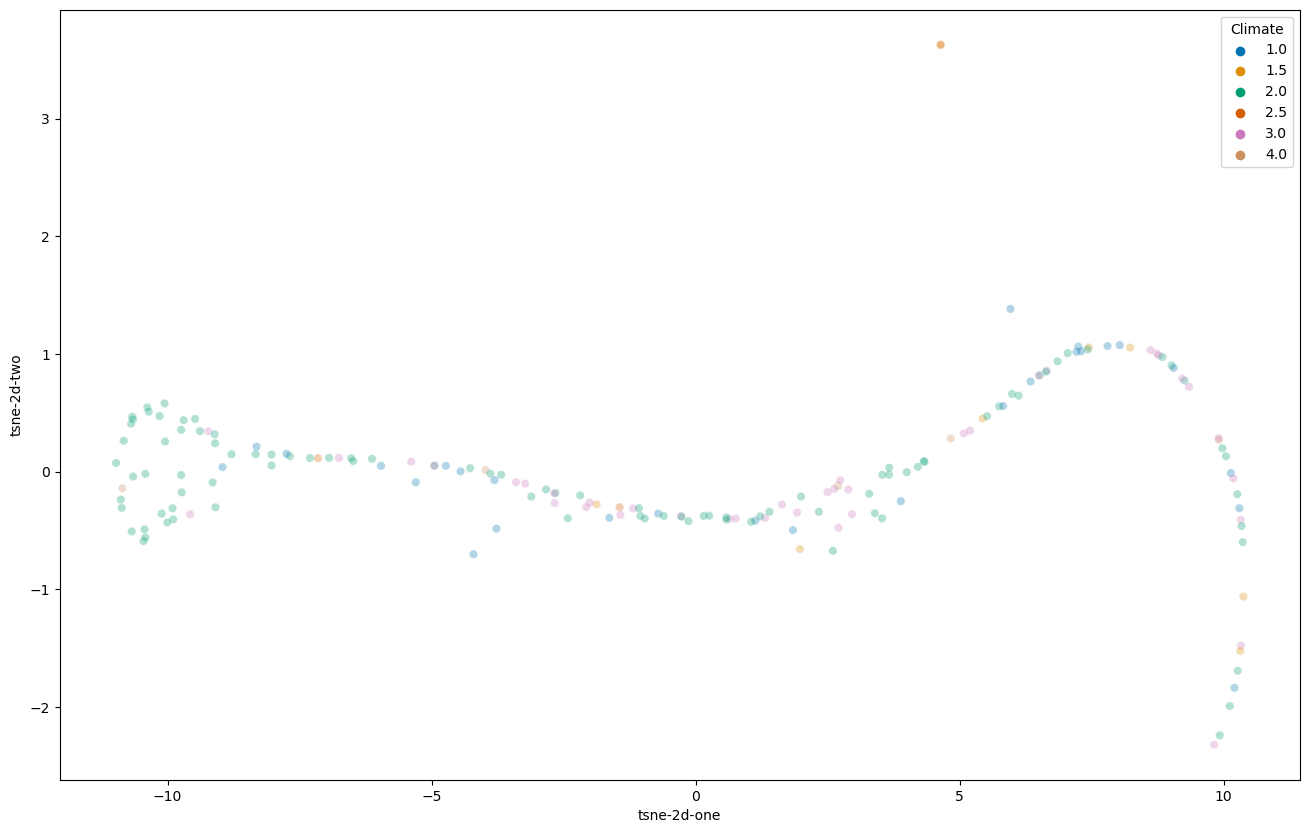

In [ ]:
countries_dataset['tsne-2d-one'] = tsne_results[:,0]
countries_dataset['tsne-2d-two'] = tsne_results[:,1]

plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", 
    y="tsne-2d-two",
    hue="Climate",
    palette=sns.color_palette("colorblind", 6),
    data=countries_dataset,
    legend="full",
    alpha=0.3
)

Now we'll try with *UMAP*.

In [ ]:
# imports
import umap.umap_ as umap
import matplotlib.pyplot as plt

In [ ]:
# apply UMAP
trans = umap.UMAP(n_neighbors=5, random_state=42).fit(countries_dataset)

trans2 = umap.UMAP(n_neighbors=5, random_state=42).fit_transform(countries_dataset)

In [ ]:
# get climate column
climate = countries_dataset['Climate'].tolist()

Text(0.5, 1.0, 'UMAP projection of the Countries dataset')

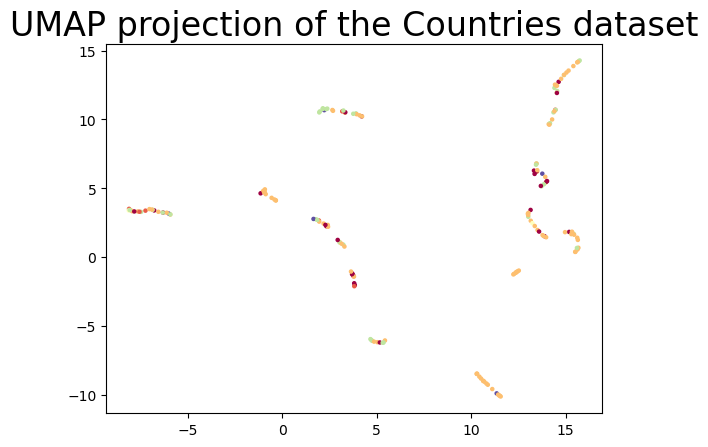

In [ ]:
plt.scatter(
    trans.embedding_[:, 0],
    trans.embedding_[:, 1],
    s=5,
    c=climate,
    cmap='Spectral'
)

plt.title('UMAP projection of the Countries dataset', fontsize=24)

Text(0.5, 1.0, 'UMAP projection of the Countries dataset')

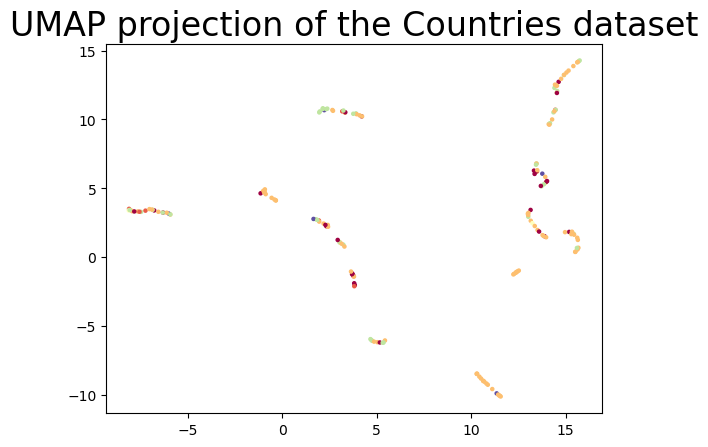

In [ ]:
plt.scatter(
    trans2[:, 0],
    trans2[:, 1],
    s=5,
    c=climate,
    cmap='Spectral'
)

plt.title('UMAP projection of the Countries dataset', fontsize=24)



## Exercise 6
Replicate that plot! Using `economist_data.csv` file.

In [32]:
# imports
import pandas as pd
import matplotlib.pyplot as plt

In [33]:
dataset = pd.read_csv("../economist_data.csv")

dataset

,Country,HDI.Rank,HDI,CPI,Region
0,Afghanistan,172,0.398,1.5,Asia Pacific
1,Albania,70,0.739,3.1,East EU Cemt Asia
2,Algeria,96,0.698,2.9,MENA
3,Angola,148,0.486,2.0,SSA
4,Argentina,45,0.797,3.0,Americas
...,...,...,...,...,...
168,Vanuatu,125,0.617,3.5,Asia Pacific
169,Venezuela,73,0.735,1.9,Americas
170,Yemen,154,0.462,2.1,MENA
171,Zambia,164,0.430,3.2,SSA


In [34]:
# we can notice that the colors are determined by regions

region = dataset['Region'].unique().tolist()

region

['Asia Pacific',
 'East EU Cemt Asia',
 'MENA',
 'SSA',
 'Americas',
 'EU W. Europe']

In [35]:
# but regions have different names

region_labels = [
    'Asia & Oceania',
    'Americas',
    'Middle East & North Africa',
    'Sub-Saharan Africa',
    'Central Eastern Europe',
    'OECD'
]

region_labels

['Asia & Oceania',
 'Americas',
 'Middle East & North Africa',
 'Sub-Saharan Africa',
 'Central Eastern Europe',
 'OECD']

In [36]:
# similarly, we need the country list
countries = dataset['Country'].unique().tolist()

In [37]:
# we need also colors
colors = ['#62cbde','#1789c2','#de5f6a', '#801509' ,'#008049','#007180']

### Polynomial regression calculus

In [ ]:
poly_dataset = dataset
poly_dataset.sort_values(by=['CPI'], inplace=True)
xp = poly_dataset['CPI'].values
yp = poly_dataset['HDI'].values



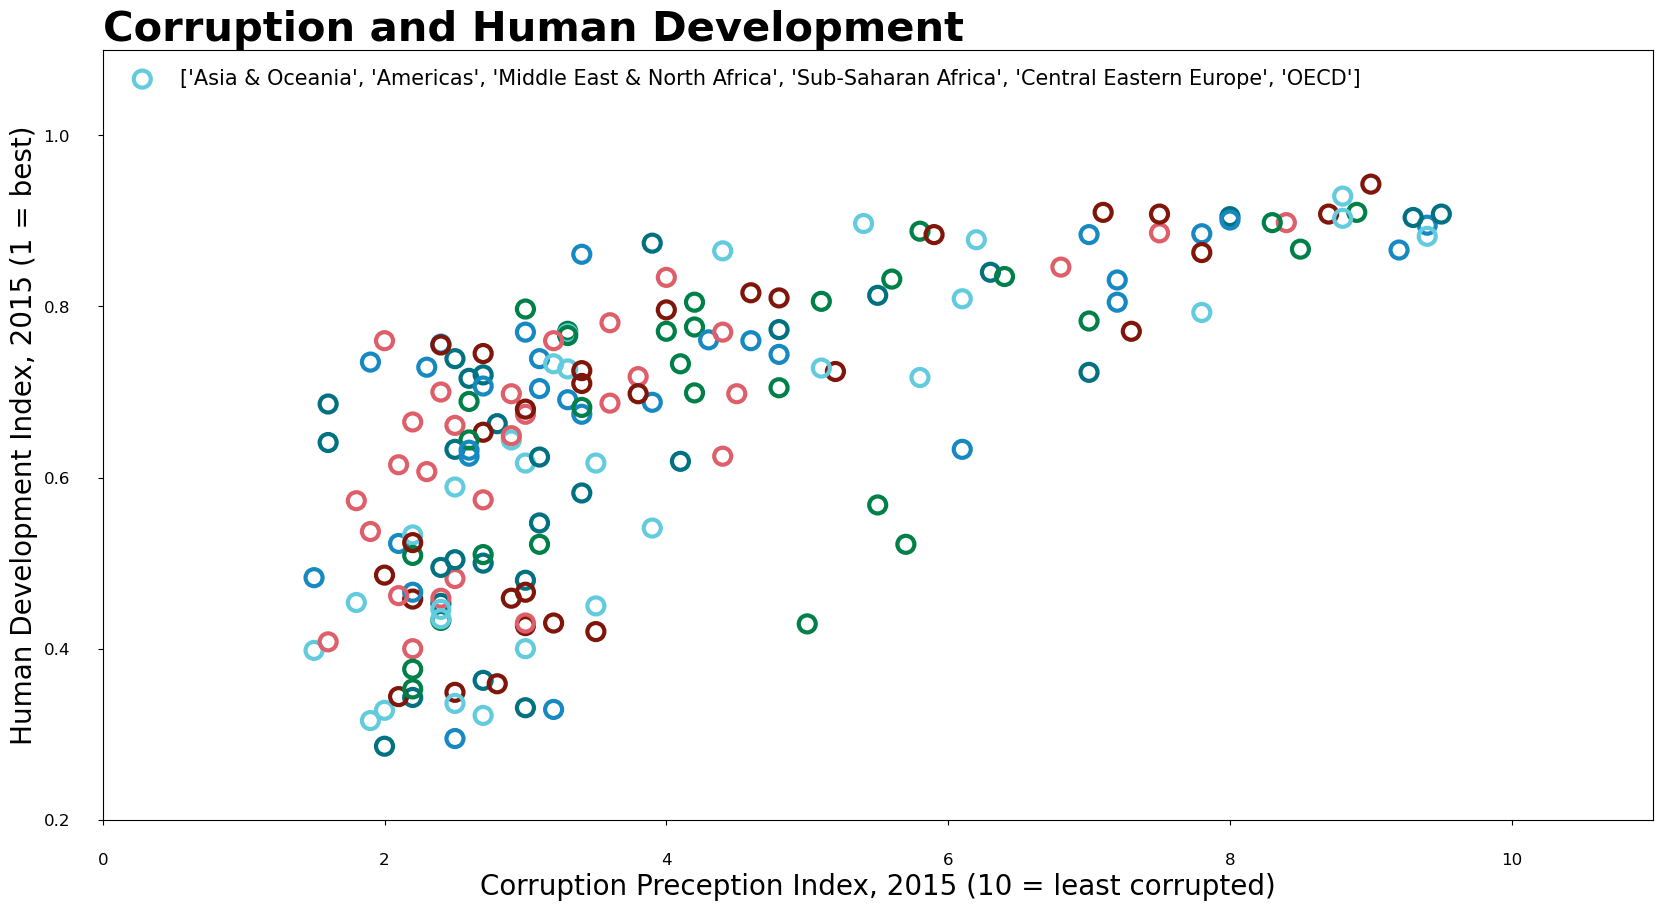

In [40]:
plt.figure(figsize=(20,10))

# scatter plot
plt.scatter(
    'CPI',
    'HDI',
    data = dataset,
    s = 150,
    label = region_labels,
    edgecolors=colors,
    facecolors='none',
    linewidths = 3
)

# need for a regression line
# need for country names
# need for the grid (lines) behind the graph

# decorations
plt.xlabel(
    'Corruption Preception Index, 2015 (10 = least corrupted)', 
    fontsize=20)
plt.ylabel(
    'Human Development Index, 2015 (1 = best)', 
    fontsize=20)
plt.title(
    label='Corruption and Human Development', 
    fontsize=30, loc='left', 
    fontweight='bold')
plt.ylim(0.2, 1.1)
plt.xlim(0, 11)
plt.tick_params(
    direction='out', 
    labelsize = 'large',
    pad = 20)
plt.legend(
    loc='upper left',
    ncol=6,
    mode="expand",
    fontsize=15,
    edgecolor='none')

plt.show()